## K-means ##
### scikit learn ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,cluster
from PIL import Image

In [2]:
irisset = datasets.load_iris()
irissettarget = np.array(irisset.target)
irisset = np.array(irisset.data)
kmeans= cluster.KMeans(3)
kmeans.fit_predict(irisset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### numpy ###

In [3]:
class Kmeans(object):
    """
    K-means
    参数
    ------
    _K: 聚类中心数量
    _data: 训练集数据
    dis: 到聚类中心距离
    _threshold: 误差阈值
    _datanum: 样本数量
    label: 数据所属类别
    centers: 聚类中心
    _precenters: 上一次聚类中心
    _iternum: 最大迭代次数
    loss: 误差
    返回值
    -------
    label: 数据所属类别
    """
    def __init__(self,K,iternum,data,threshold=0):
        self._K = K
        self._data = data
        self.dis = np.full(self._data.shape[0], np.inf)
        self._threshold = threshold
        self._datanum = self._data.shape[0]
        self._featurenum = self._data.shape[1]
        self.label = np.full(self._datanum,0,int)
        self.centers = np.zeros([self._K,self._featurenum])
        self._precenters = np.zeros([self._K,self._featurenum])
        self._iternum = iternum
        self.loss = 0
    
        
    """
    随机取值，初始化聚类中心   
    """  
    def init_centers(self):
        for i in range(self._K):
            self.centers[i] = self._data[np.random.randint(0,self._datanum)]
    
    """
    计算距离（欧氏距离）
    """    
    def _cal_dis(self,x,y):
        return np.sum((x - y) ** 2) ** 0.5
    
    """
    选择最近的聚类中心作为数据的种类
    """
    def _label(self):
        label = 0
        for k in range(self._K):
            for i in range(self._datanum):
                d = self._cal_dis(self._data[i],self.centers[k])       
                if d < self.dis[i]:
                    self.dis[i] = d
                    self.label[i] = label
            label += 1
    
    """
    计算每类数据的均值，作为新的聚类中心
    """
    def _update_centers(self):
        _lossk = 0
        _sumk = np.zeros([self._K,self._featurenum])
        _numk = np.zeros([self._K])
        self._precenters = self.centers.copy()
        for i in range(self._datanum):
            for k in range(self._K):
                if self.label[i] == k:
                    _sumk[k] += self._data[i]
                    _numk[k] += 1
                    break
        for i in range(self._K):
            self.centers[i] = _sumk[i]/_numk[i]
        _lossk += self._cal_dis(self.centers,self._precenters)
        self.loss = _lossk
    
    def run(self):
        self.init_centers()
        for i in range(self._iternum): 
            self._label()
            self._update_centers()
            if self.loss > self._threshold:
                break
        return self.label

In [4]:
mykmeans = Kmeans(3,10,irisset,0.1)
mykmeans.run()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Image process ##

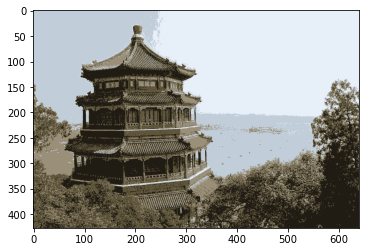

In [5]:
china_img = datasets.load_sample_image('china.jpg')
img_x,img_y = china_img.shape[0],china_img.shape[1]
china_img = china_img.reshape(img_x*img_y,3)
b = np.zeros([img_x*img_y,3])
kmeans= cluster.KMeans(5)
a = kmeans.fit_predict(china_img)
for i in range(img_x*img_y):
    b[i] = kmeans.cluster_centers_ [a[i]]
plt.imshow(b.reshape(img_x,img_y,3).astype(int))

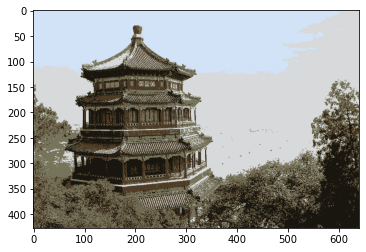

In [6]:
mykmeans = Kmeans(5,10,china_img,0.1)
b = np.zeros([img_x*img_y,3])
a = mykmeans.run()
for i in range(img_x*img_y):
    b[i] = mykmeans.centers [a[i]]
plt.imshow(b.reshape(img_x,img_y,3).astype(int))